In [1]:
import numpy as np
import nbimporter
import vectorspace as vec
from collections import defaultdict
import pymongo

Importing Jupyter notebook from vectorspace.ipynb


In [2]:
vsm = vec.VSM('inforet', 'cran_tokens', field='lemma')

# Exercize
Given the following data structures:

### Term frequency index as <code>{token: {document: count}}</code>

In [3]:
print('the', list(vsm.word_tf['the'].items())[:5])
print('paper', list(vsm.word_tf['paper'].items())[:5])

the [(1362, 11), (1360, 6), (1359, 4), (1358, 2), (1357, 2)]
paper [(1330, 1), (1327, 1), (1313, 1), (1303, 2), (1301, 1)]


### Term frequency index as <code>{document: {token: count}}</code>

In [4]:
print(1325, list(vsm.doc_tf[1325].items())[:5])
print(2, list(vsm.doc_tf[2].items())[:5])

1325 [('could', 1), ('due', 1), ('air', 1), ('head', 2), ('loss', 2)]
2 [('here', 1), ('can', 2), ('study', 2), ('have', 2), ('situation', 2)]


## TASK
Implement a system for query evaluation which avoids to match a query against all the documents in the corpus. Assume that the query is provided as a list of tokens.

In [23]:
def search(q_tokens):
    len_d, dot = {}, defaultdict(lambda: 0)
    q = [x for x in q_tokens if x in vsm.word_tf.keys()]
    N = len(vsm.doc_tf)
    for token in q:
        idf_t = np.log(N / len(vsm.word_tf[token]))
        for doc, count in vsm.word_tf[token].items():
            if doc not in len_d.keys():
                mxv = max(vsm.doc_tf[doc].values())
                len_d[doc] = sum([(v / mxv) * (np.log(N / len(vsm.word_tf[k]))) 
                                  for k, v in vsm.doc_tf[doc].items()])
            tf_t_d = count / max(vsm.doc_tf[doc].values())
            dot[doc] += tf_t_d * idf_t
    return sorted([(k, v / len_d[k]) for k, v in dot.items()], key=lambda x: -x[1])

In [29]:
q = ['experimental', 'study', 'aerodynamic', 'control', 'algorithm']

In [30]:
import matplotlib.pyplot as plt

In [31]:
R = search(q)

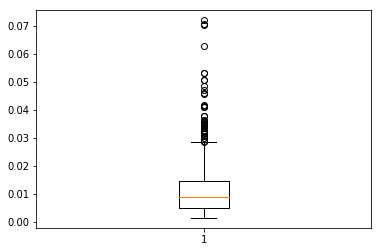

In [35]:
scores = np.array([y for x, y in R])
plt.boxplot(scores)
plt.show()